Credit Risk Prediction using Machine Learning
1. Data Loading & Cleaning
2. Feature Selection
3. Modeling
4. Model Evaluation
5. ROC Curve
6. Key Insights
7. Conclusion

Executive Summary

This project builds a machine learning model to predict whether a loan will default using LendingClub financial data. The analysis shows that borrowers with high debt compared to income and lower annual income are more likely to default. The project also highlights a real-world challenge: default cases are rare, making prediction harder. Model performance is evaluated using ROC analysis instead of relying only on accuracy.

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input/credit-risk-lendingclub'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-risk-lendingclub/accepted_2007_to_2018Q4.csv


In [1]:
import pandas as pd

df = pd.read_csv(
    "/kaggle/input/credit-risk-lendingclub/accepted_2007_to_2018Q4.csv",
    nrows=200000
)

df.head()


/tmp/ipykernel_55/1528120509.py:3: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_needed = [
    "loan_amnt",
    "int_rate",
    "annual_inc",
    "dti",
    "fico_range_high",
    "loan_status"
]

df = df[columns_needed]
df.head()


,loan_amnt,int_rate,annual_inc,dti,fico_range_high,loan_status
0,3600.0,13.99,55000.0,5.91,679.0,Fully Paid
1,24700.0,11.99,65000.0,16.06,719.0,Fully Paid
2,20000.0,10.78,63000.0,10.78,699.0,Fully Paid
3,35000.0,14.85,110000.0,17.06,789.0,Current
4,10400.0,22.45,104433.0,25.37,699.0,Fully Paid


In [4]:
df["loan_status"].value_counts()


loan_status
Fully Paid            140992
Charged Off            35090
Current                22637
Late (31-120 days)       785
In Grace Period          347
Late (16-30 days)        148
Default                    1
Name: count, dtype: int64

In [5]:
df = df[df["loan_status"].isin(["Charged Off", "Fully Paid"])]

In [6]:
df["loan_status"] = df["loan_status"].map({
    "Charged Off": 1,
    "Fully Paid": 0
})


In [7]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 176080 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        176080 non-null  float64
 1   int_rate         176080 non-null  float64
 2   annual_inc       176080 non-null  float64
 3   dti              176080 non-null  float64
 4   fico_range_high  176080 non-null  float64
 5   loan_status      176080 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.4 MB


In [8]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Results:")
print(classification_report(y_test, log_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     28317
           1       0.56      0.09      0.16      6899

    accuracy                           0.81     35216
   macro avg       0.69      0.54      0.52     35216
weighted avg       0.77      0.81      0.75     35216



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)


In [13]:
print("Random Forest Results:")
print(classification_report(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     28317
           1       0.44      0.14      0.21      6899

    accuracy                           0.80     35216
   macro avg       0.63      0.55      0.55     35216
weighted avg       0.75      0.80      0.75     35216



In [14]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


dti                0.295339
annual_inc         0.219931
loan_amnt          0.185278
int_rate           0.184507
fico_range_high    0.114945
dtype: float64

In [15]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print(classification_report(y_test, log_preds))


              precision    recall  f1-score   support

           0       0.88      0.68      0.77     28317
           1       0.32      0.64      0.43      6899

    accuracy                           0.67     35216
   macro avg       0.60      0.66      0.60     35216
weighted avg       0.77      0.67      0.70     35216



In [16]:
rf_model = RandomForestClassifier(class_weight="balanced")
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88     28317
           1       0.44      0.12      0.19      6899

    accuracy                           0.80     35216
   macro avg       0.63      0.54      0.54     35216
weighted avg       0.74      0.80      0.75     35216



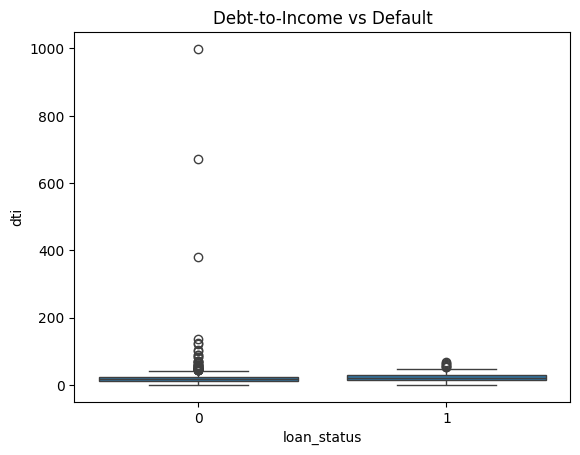

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="loan_status", y="dti", data=df)
plt.title("Debt-to-Income vs Default")
plt.show()


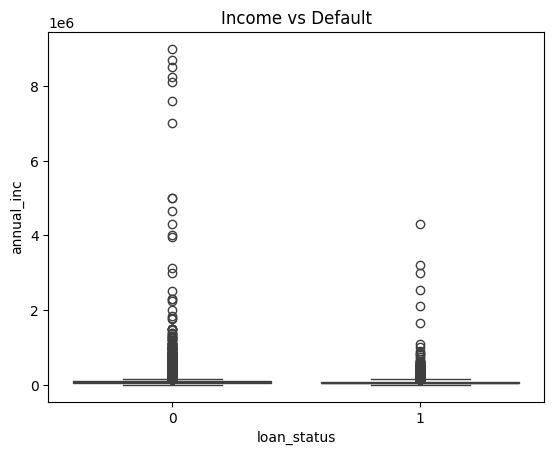

In [18]:
sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.title("Income vs Default")
plt.show()


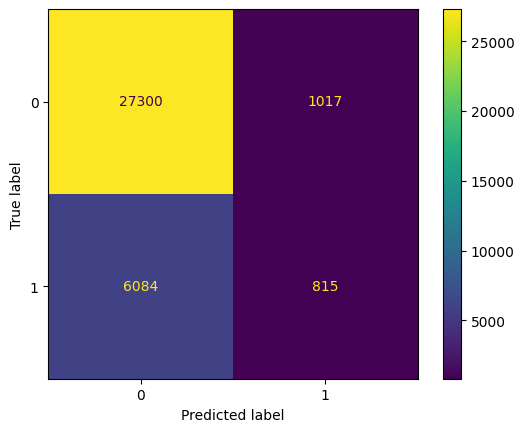

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()


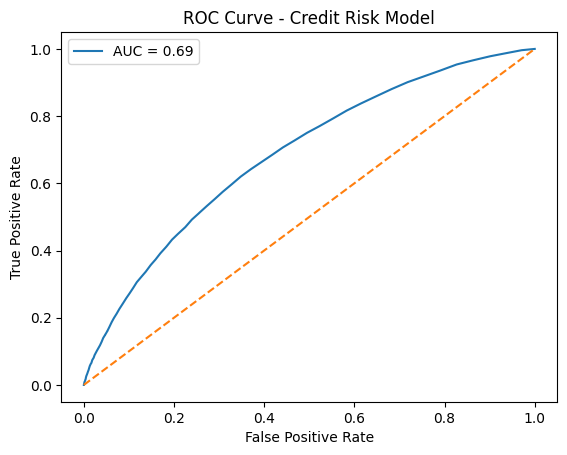

In [20]:
    from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Risk Model")
plt.legend()
plt.show()


Conclusion

The model shows moderate ability to separate safe and risky loans (AUC = 0.69). Financial stress indicators such as debt-to-income ratio are the strongest risk signals. The results reflect real credit risk challenges and show why focusing on detecting risky borrowers is more important than chasing high accuracy.